In [184]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)

import sys
sys.path.append("../") # go to parent dir

import numpy as np
import matplotlib.pyplot as plt
import imgaug as ia
import imgaug.augmenters as iaa
import data.datasets


In [5]:
x = np.fromfile(r"/home/sms/vws/frappe/saved/fc/x.bin", dtype=np.float32)
X = np.reshape(x, (32, 1, 110, 256, 256))
frames = np.squeeze(X[1, :, :, :, :])

In [6]:
sometimes = lambda aug: iaa.Sometimes(0.7, aug)
seq = iaa.Sequential( sometimes (iaa.CoarseDropout(0.1, size_percent=(0.01))))

In [7]:
imgs = seq(images=list(frames))

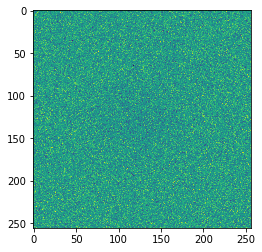

In [8]:
plt.imshow(imgs[17])

In [155]:
aug = iaa.Affine(
                                        scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
                                        #translate_percent={"x": (0, 0), "y": (0, 0)},
                                        #rotate=(-45, 45),
                                        shear=(-16, 16),
                                        order=[0, 1],
                                        #cval=(0, 255),
                                        mode=ia.ALL
        )

In [156]:
imgs= aug(images = list(frames))

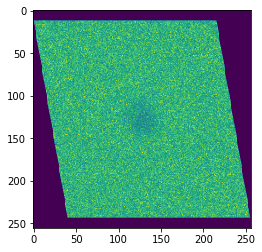

In [159]:
plt.imshow(imgs[32])

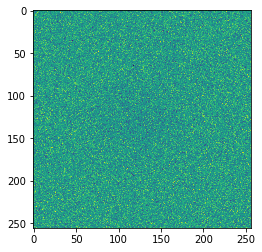

In [11]:
plt.imshow(1.5*imgs[17])

In [31]:
from torch.distributions import uniform
import torch

batch_size = 32
lb         = 0.7
ub         = 1.3
        

distribution = uniform.Uniform(torch.Tensor([lb]),torch.Tensor([ub]))
multiplier = distribution.sample(torch.Size([batch_size]))

In [34]:
y = multiplier[:, None, None, None].numpy() * X

In [35]:
y.shape

(32, 1, 110, 256, 256)

In [36]:
X[1, :, 1, :, :]


array([[[0.9605227 , 0.73687595, 1.0534382 , ..., 0.9305772 ,
         0.82859355, 0.7448843 ],
        [1.097599  , 0.9378093 , 0.86479616, ..., 1.154069  ,
         1.0663203 , 0.8675759 ],
        [0.8248998 , 0.8037097 , 0.73917025, ..., 1.0889752 ,
         0.8870176 , 0.8603255 ],
        ...,
        [1.0789204 , 0.93036675, 1.0097313 , ..., 1.0150102 ,
         0.9241073 , 0.91252095],
        [0.945776  , 0.8404873 , 0.8563444 , ..., 0.6342423 ,
         0.66286683, 0.63053334],
        [0.86903715, 1.0342222 , 0.7417737 , ..., 1.0550412 ,
         1.1320378 , 1.0954862 ]]], dtype=float32)

In [37]:
y[1, :, 1, :, :]

array([[[0.8823918 , 0.676937  , 0.96774936, ..., 0.8548822 ,
         0.76119405, 0.6842939 ],
        [1.0083181 , 0.86152595, 0.7944519 , ..., 1.0601946 ,
         0.9795836 , 0.7970055 ],
        [0.75780076, 0.7383343 , 0.67904466, ..., 1.0003958 ,
         0.81486577, 0.7903449 ],
        ...,
        [0.9911588 , 0.8546888 , 0.9275977 , ..., 0.93244725,
         0.8489385 , 0.8382946 ],
        [0.8688446 , 0.77212036, 0.7866876 , ..., 0.58265173,
         0.6089479 , 0.5792445 ],
        [0.7983479 , 0.9500965 , 0.68143636, ..., 0.969222  ,
         1.0399555 , 1.0063771 ]]], dtype=float32)

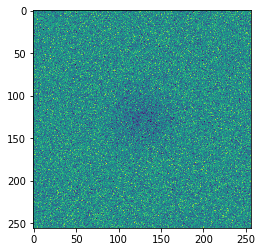

In [43]:
plt.imshow(frames[12])

In [44]:
import cv2

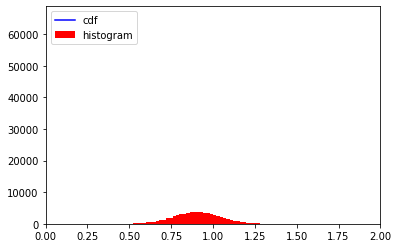

In [54]:
img=frames[12]

hist,bins = np.histogram(img.flatten(),1,[0,2])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),100,[0,2], color = 'r')
plt.xlim([0,2])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [55]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

In [516]:
frames = np.squeeze(X[19, :, :, :, :])

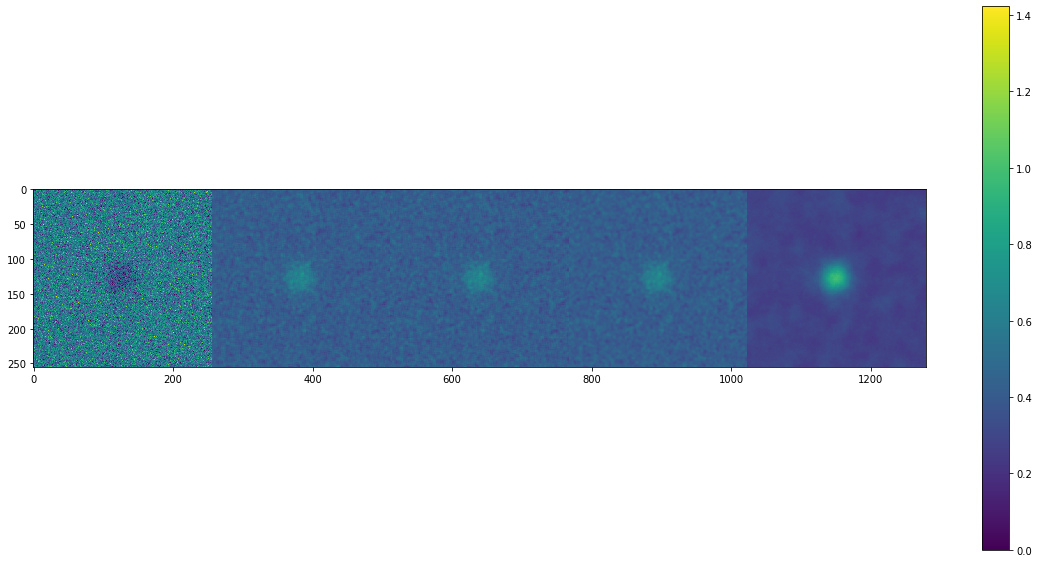

In [518]:
img = (frames[10])
thresh1 = img
#ret,thresh1 =  cv2.threshold(1-img,0.6,np.amax(img),cv2.THRESH_BINARY_INV)#edges = cv2.Canny(img,0,100)#cv2.equalizeHist(img)
thresh1 = 1-thresh1
#thresh1 = thresh1/np.amax(thresh1)
blurred = cv2.blur(thresh1,(5,5))
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(thresh1,-1,kernel)

gauss =  cv2.GaussianBlur(thresh1,(9,9),0)
bil = cv2.bilateralFilter(thresh1,25,153,153)

res = np.hstack((img,blurred, dst, gauss, np.power(bil/np.amax(bil),3))) #stacking images side-by-side
plt.imshow(res, vmin=0, vmax=np.amax(img))
plt.colorbar()
plt.show()

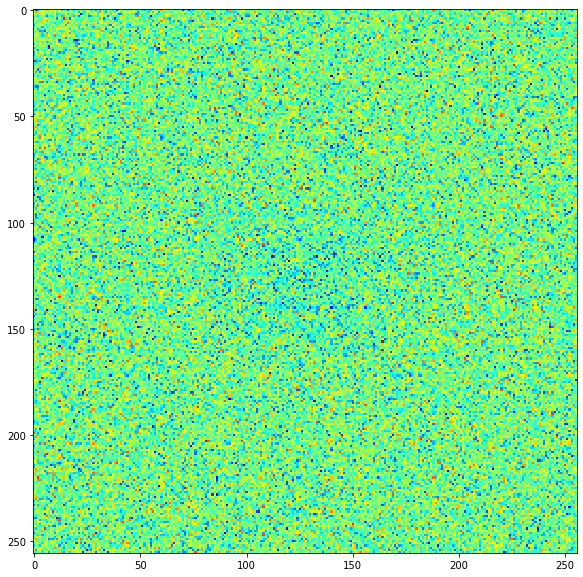

In [365]:
plt.imshow(img, 'jet')

In [118]:
img[128, 128]

240

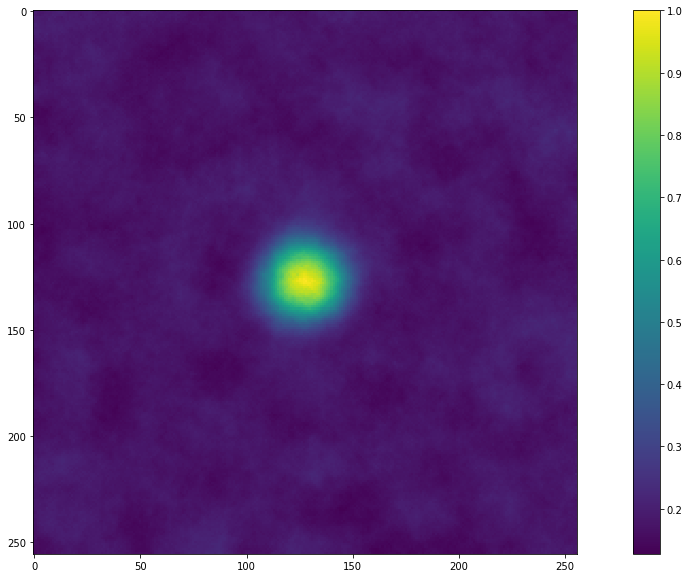

In [468]:
plt.imshow(np.power(bil/np.amax(bil),2))
plt.colorbar()

In [434]:
bil[128, 128]

0.434267

In [461]:
np.amax(bil/np.amax(bil))

1.0